In [20]:
import numpy as np
from random import *
from numpy.random import *
import matplotlib.pyplot as plt

In [21]:
def total_energy(grid, J):
    vertical = np.sum(grid[:-1,:]*grid[1:, :])
    horizontal = np.sum(grid[:,:-1]*grid[:,1:])
    return -J*(vertical+horizontal)
    

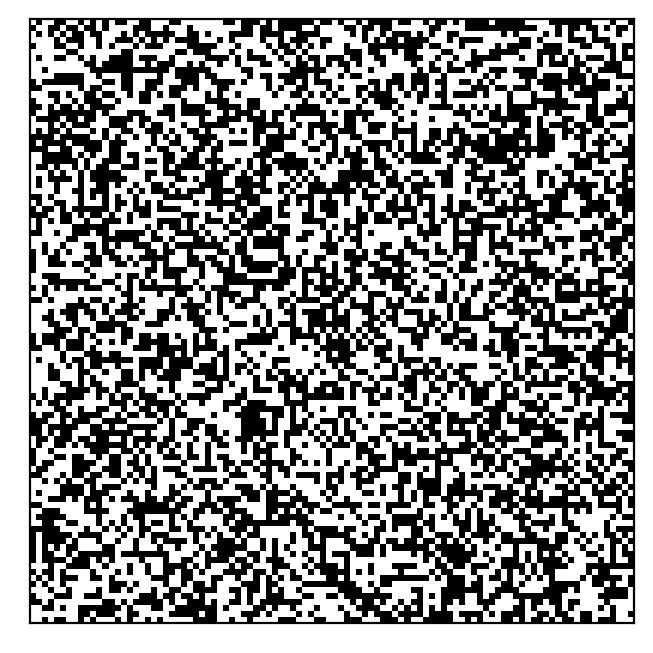

In [31]:
#Constants
J = 1 
T = 1
N = 100   # size of lattice 
kB = 1
beta = 1/(kB*T)

# Initialize initial spin lattice
spins = np.random.choice([1,-1], (N,N))

plt.figure(dpi=200)
plt.xticks( [] )
plt.yticks( [] )
plt.imshow(spins,cmap='gray')


Overall magnetization: -68


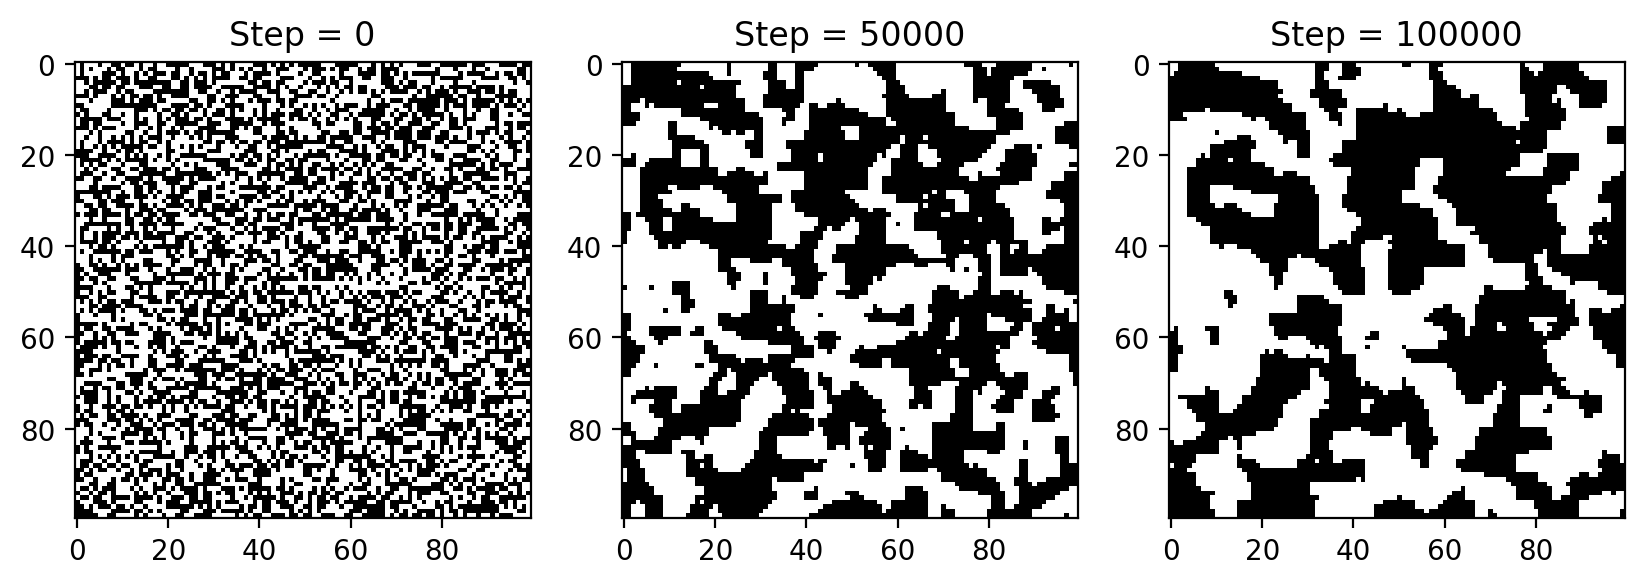

In [39]:
#Constants
J = 1 
T = 1
N = 100   # size of lattice 
kB = 1
beta = 1/(kB*T)

# Initialize initial spin lattice
spins = np.random.choice([1,-1], (N,N))

fig, ax = plt.subplots(1,3, figsize=(10,20), dpi=200)
ax[0].imshow(spins, cmap='gray')
ax[0].set_title('Step = 0')
#MC parameters
steps = 100000

E = total_energy(spins,J)
energies = [E]

for step in range(steps):
    # Choose a random spin
    i = randint(0,N)
    j = randint(0,N)
    new = spins.copy()
    new[i,j] = -new[i,j]        #Random spin flip

    a = total_energy(new,J)
    dE = a- total_energy(spins,J)

    if random() < np.exp(-beta*dE):
        spins = new
        E += dE
    energies.append(E)

    if step == 50000:
        ax[1].imshow(spins, cmap='gray') 
        ax[1].set_title('Step = 50000')

ax[2].imshow(spins, cmap='gray') 
ax[2].set_title('Step = 100000')
print('Overall magnetization:', np.sum(spins))

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.animation as animation

def metropolis( lattice, oldE ) : 
    # flip a random spin and calculate $dE$
    i, j = randint( N, size=2 )
    lattice[i,j] *= -1    # flip the ij spin
    E = total_energy(lattice)
    deltaE = E - oldE

    # these are the Metropolis tests 
    if deltaE < 0 : 
        # keep the flipped spin because it lowers the energy
        return lattice, E
    if rand() < np.exp( - deltaE / T ) : 
        # keep the spin flip because the random number is less than $e^{-dE/T}$
        return lattice, E

    # the spin flip is rejected 
    lattice[i,j] *= -1    # flip the ij spin back
    E = oldE        # and keep the old energy
    return lattice, E

def initIsing(N):
    global isingImage, spinLattice

    # this is the initial, random, t=0, state
    spinLattice = np.random.choice([1,-1], (N,N))
    
    isingImage = plt.imshow(spinLattice, interpolation='none', cmap='gray')
    return ( isingImage, )

def animateIsing(i) : 
    global isingImage, spinLattice 
    
    E = total_energy( spinLattice ) 
    for i in range(N*N) : 
        spinLattice, E = metropolis( spinLattice, E ) 
    isingImage.set_data( spinLattice ) 
    return ( isingImage, ) 

# i'm using little m metropolis from above instead of this function
def Metropolis( s, i ) : 
    # this should update isingData for t=t[i] using the Metropolis algorithm
    isingData = rand( L, L )  < i / (2*n) + 0.5 
    return isingData 
    
def makeAnimation( T, n ) : 
    # set up the figure
    fig = plt.figure( )
    plt.subplot( )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.title( r'$k_{\rm B}T/J=%3.2f$' % T )
    # and create the animation
    anim = FuncAnimation( fig, animateIsing, init_func=initIsing,
                                frames=n, interval=250, blit=True )
    return anim

n = 100000
T = 1
anim = makeAnimation( T, n // (L*L) ) # because animateIsing() runs metropolis() L*L times

HTML( anim.to_html5_video() )

In [15]:
def metropolis( lattice, oldE ) : 
    # flip a random spin and calculate $dE$
    i, j = randint( N, size=2 )
    lattice[i,j] *= -1    # flip the ij spin
    E = total_energy(lattice, J=1)
    deltaE = E - oldE

    # these are the Metropolis tests 
    if deltaE < 0 : 
        # keep the flipped spin because it lowers the energy
        return lattice, E
    if rand() < np.exp( - deltaE / T ) : 
        # keep the spin flip because the random number is less than $e^{-dE/T}$
        return lattice, E

    # the spin flip is rejected 
    lattice[i,j] *= -1    # flip the ij spin back
    E = oldE        # and keep the old energy
    return lattice, E



c:\Users\Ron\anaconda3\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


Overall magnetization: -10


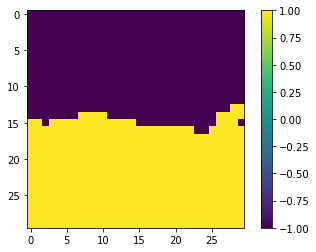

In [17]:
#Constants
J = 1 
T = 1
N = 30   # size of lattice 
kB = 1
beta = 1/(kB*T)

# Initialize initial spin lattice
spins = np.random.choice([1,-1], (N,N))

#MC parameters
steps = 1000000

E = total_energy(spins,J)
energies = [E]

for step in range(steps):
    spins, E = metropolis(spins, E)
    energies.append(E)


plt.imshow(spins)
plt.colorbar()
print('Overall magnetization:', np.sum(spins))